In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [3]:
train = pd.read_csv('C:/Users/nicolas.conceicao/Desktop/Big Data e Data Science/BootCamp DataScience/Titanic/train.csv')
test = pd.read_csv('C:/Users/nicolas.conceicao/Desktop/Big Data e Data Science/BootCamp DataScience/Titanic/test.csv')

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train['Age'].fillna(' 0', inplace=True)
test['Age'].fillna(' 0', inplace=True)
train['Cabin'].fillna(' 0', inplace=True)
test['Cabin'].fillna(' 0', inplace=True)
train['Embarked'].fillna(' 0', inplace=True)
test['Embarked'].fillna(' 0', inplace=True)

In [9]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [51]:
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_Range'] = pd.cut(df['Age'], cut_points, labels=label_names)
    return df

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

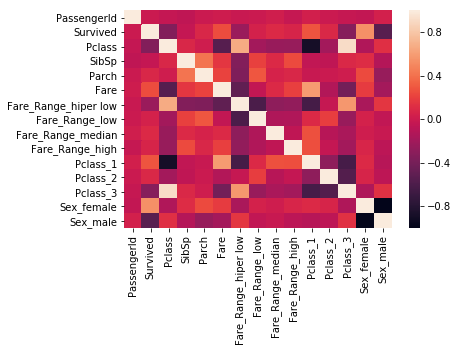

In [36]:
sns.heatmap(train.corr())
plt.show()

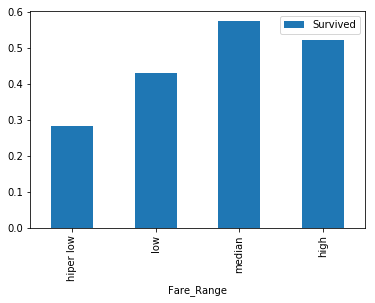

In [11]:
cut_points = [ 0, 20, 40,60, 80]
label_names = ['hiper low', 'low', 'median', 'high']

def process_fare(df, cut_points, label_names):
    df['Fare'] = df['Fare']
    df['Fare_Range'] = pd.cut(df['Fare'], cut_points, labels=label_names)
    return df

train = process_fare(train, cut_points, label_names)
test = process_fare(test, cut_points, label_names)

fare_pivot = train.pivot_table(index='Fare_Range', values='Survived')
fare_pivot.plot.bar()

In [12]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

train = create_dummies(train, 'Fare_Range')
test = create_dummies(test, 'Fare_Range')
train = create_dummies(train, 'Pclass')
test = create_dummies(test, 'Pclass')
train = create_dummies(train, 'Sex')
test = create_dummies(test, 'Sex')


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId             891 non-null int64
Survived                891 non-null int64
Pclass                  891 non-null int64
Name                    891 non-null object
Sex                     891 non-null object
Age                     891 non-null object
SibSp                   891 non-null int64
Parch                   891 non-null int64
Ticket                  891 non-null object
Fare                    891 non-null float64
Cabin                   891 non-null object
Embarked                891 non-null object
Fare_Range              802 non-null category
Fare_Range_hiper low    891 non-null uint8
Fare_Range_low          891 non-null uint8
Fare_Range_median       891 non-null uint8
Fare_Range_high         891 non-null uint8
Pclass_1                891 non-null uint8
Pclass_2                891 non-null uint8
Pclass_3                891 non-null uint8
Sex_female              

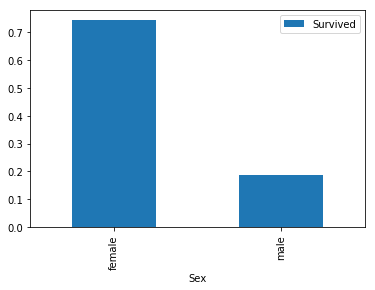

In [15]:
sex_pivot = train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()
plt.show()

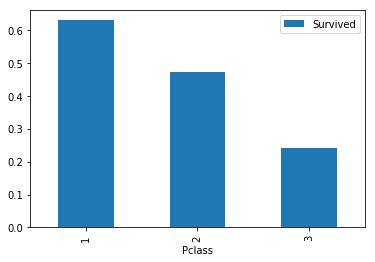

In [16]:
class_pivot = train.pivot_table(index='Pclass', values='Survived')
class_pivot.plot.bar()
plt.show()

In [19]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_Range',
       'Fare_Range_hiper low', 'Fare_Range_low', 'Fare_Range_median',
       'Fare_Range_high', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [25]:
columns = ['Fare_Range_hiper low', 'Fare_Range_low', 'Fare_Range_median',
       'Fare_Range_high', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male']

In [26]:
train[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Fare_Range_hiper low    891 non-null uint8
Fare_Range_low          891 non-null uint8
Fare_Range_median       891 non-null uint8
Fare_Range_high         891 non-null uint8
Pclass_1                891 non-null uint8
Pclass_2                891 non-null uint8
Pclass_3                891 non-null uint8
Sex_female              891 non-null uint8
Sex_male                891 non-null uint8
dtypes: uint8(9)
memory usage: 7.9 KB


In [78]:
X = train[columns]
y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=42)

In [79]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

predictions = logreg.predict(test_X)

In [80]:
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.773109243697


In [81]:
logreg = LogisticRegression()

scores = cross_val_score(logreg, train_X, train_y, cv=10)
print(scores)

accuracy = np.mean(scores)
print(accuracy)

[ 0.8         0.92592593  0.83333333  0.73584906  0.69811321  0.73584906
  0.81132075  0.73584906  0.83018868  0.8490566 ]
0.795548567435


In [82]:
model = LogisticRegression()
a = model.fit(train_X, train_y)

model.fit(train_X, train_y)
Ytrain = model.predict(train_X)
Ytest = model.predict(test_X)

In [83]:
cnf_matrix = confusion_matrix(train_y, Ytrain)
print ("\n\n ---Base de Treinamento---")
print ("\n\n ---Matriz de Confusão---")
print(cnf_matrix)

print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(train_y, model.predict(train_X))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(train_y, Ytrain))



 ---Base de Treinamento---


 ---Matriz de Confusão---
[[288  45]
 [ 61 140]]


 ---Logistic Model---
Logistic AUC = 0.78
             precision    recall  f1-score   support

          0       0.83      0.86      0.84       333
          1       0.76      0.70      0.73       201

avg / total       0.80      0.80      0.80       534



In [85]:
val = test

In [86]:
logreg = LogisticRegression()
logreg.fit(X, y)
val_predictions = logreg.predict(val[columns])

In [87]:
submission_df = {'PassengerId': val['PassengerId'], 'Survived': val_predictions}
submission = pd.DataFrame(submission_df)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [88]:
submission.to_csv('submission2.csv', index=False)